<img src="logo_bottleneck.png" styles="height:100">

<center><h1><span style="color:brown">Gestion des données</span></h1></center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# chargement des données
erp = pd.read_excel("erp.xlsx")
web = pd.read_excel("web.xlsx")
liaison = pd.read_excel("liaison.xlsx")

/Applications/anaconda3/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:296: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<h2><span style = "color:brown">0. Nettoyage des données</span></h2>

### Aperçu des données

In [3]:
# Données ERP

display(erp.head())

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [4]:
# Données CMS

pd.set_option('display.max_columns',50)
display(web.head())

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46.000000,2018-06-01 11:53:46.000001,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52.000000,2018-02-08 11:58:52.000000,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41.000000,2018-02-08 12:49:41.000000,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36.000000,2018-02-08 13:08:36.000000,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:04.999999,2018-02-09 13:01:05.000000,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [5]:
# Données liaison

liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


### Nettoyage des données - ERP

In [6]:
# Info

erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [7]:
erp.describe()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.415636,26.496970
std,902.644635,0.337506,26.795849,45.892422
min,3847.000000,0.000000,5.200000,0.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


In [8]:
# Valeurs de stock_quantity

erp.stock_quantity.sort_values().unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        53,  54,  55,  56,  57,  58,  60,  61,  62,  63,  64,  65,  66,
        69,  70,  72,  73,  76,  83,  84,  85,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 105, 106, 109,
       112, 114, 118, 120, 123, 124, 128, 129, 130, 132, 133, 137, 140,
       141, 143, 151, 157, 161, 163, 167, 168, 178, 180, 190, 192, 195,
       203, 209, 211, 237, 257, 267, 276, 284, 289, 363, 578])

In [9]:
# Valeurs de stock_status

erp.stock_status.value_counts()

instock       638
outofstock    187
Name: stock_status, dtype: int64

### Nettoyage des données - CMS

In [10]:
# Info

web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [11]:
# Suppression des colonnes vides

web = web.drop(['tax_class','post_content','post_password','post_content_filtered'], axis=1)
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46.000000,2018-06-01 11:53:46.000001,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52.000000,2018-02-08 11:58:52.000000,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41.000000,2018-02-08 12:49:41.000000,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36.000000,2018-02-08 13:08:36.000000,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:04.999999,2018-02-09 13:01:05.000000,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [12]:
# Vérification de valeurs manquantes

web.isna().sum()

sku                   85
virtual                0
downloadable           0
rating_count           0
average_rating        83
total_sales           83
tax_status           797
post_author           83
post_date             83
post_date_gmt         83
post_title            83
post_excerpt         797
post_status           83
comment_status        83
ping_status           83
post_name             83
post_modified         83
post_modified_gmt     83
post_parent           83
guid                  83
menu_order            83
post_type             83
post_mime_type       799
comment_count         83
dtype: int64

In [13]:
# Vérification de doublons

pd.set_option('display.max_rows', 85)
web[web.duplicated(keep = False)]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
233,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
237,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
283,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
309,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
310,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Suppression des lignes doublons

web = web.drop(web[web.duplicated(keep = False)].index)
web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430 entries, 0 to 1512
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                1428 non-null   object        
 1   virtual            1430 non-null   int64         
 2   downloadable       1430 non-null   int64         
 3   rating_count       1430 non-null   int64         
 4   average_rating     1430 non-null   float64       
 5   total_sales        1430 non-null   float64       
 6   tax_status         716 non-null    object        
 7   post_author        1430 non-null   float64       
 8   post_date          1430 non-null   datetime64[ns]
 9   post_date_gmt      1430 non-null   datetime64[ns]
 10  post_title         1430 non-null   object        
 11  post_excerpt       716 non-null    object        
 12  post_status        1430 non-null   object        
 13  comment_status     1430 non-null   object        
 14  ping_sta

In [15]:
# Suppression des lignes doublons sku

web = web.drop(web[web[['sku', 'post_date']].duplicated()].index)
web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 798
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                714 non-null    object        
 1   virtual            716 non-null    int64         
 2   downloadable       716 non-null    int64         
 3   rating_count       716 non-null    int64         
 4   average_rating     716 non-null    float64       
 5   total_sales        716 non-null    float64       
 6   tax_status         716 non-null    object        
 7   post_author        716 non-null    float64       
 8   post_date          716 non-null    datetime64[ns]
 9   post_date_gmt      716 non-null    datetime64[ns]
 10  post_title         716 non-null    object        
 11  post_excerpt       716 non-null    object        
 12  post_status        716 non-null    object        
 13  comment_status     716 non-null    object        
 14  ping_statu

In [16]:
# Vérification des valeurs de la variable tax_status

web = web.drop('post_mime_type', axis = 1)
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46.000000,2018-06-01 11:53:46.000001,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52.000000,2018-02-08 11:58:52.000000,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
2,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41.000000,2018-02-08 12:49:41.000000,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
3,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36.000000,2018-02-08 13:08:36.000000,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
4,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:04.999999,2018-02-09 13:01:05.000000,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0


In [17]:
# Vérification d'information Données numerique

web.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,post_author,post_parent,menu_order,comment_count
count,716.0,716.0,716.0,716.0,716.000000,716.000000,716.0,716.0,716.0
mean,0.0,0.0,0.0,0.0,4.001397,1.998603,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,8.508901,0.037372,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,2.000000,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,2.000000,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,2.000000,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,2.000000,0.0,0.0,0.0


In [18]:
# Suppression des données numériques ayant même valeur pour tout observation

web = web.drop(["virtual", "downloadable","rating_count", "average_rating", "post_parent", "menu_order", 
                "comment_count"], axis = 1)
web.head()

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type
0,bon-cadeau-25-euros,10.0,taxable,1.0,2018-06-01 13:53:46.000000,2018-06-01 11:53:46.000001,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product
1,15298,6.0,taxable,2.0,2018-02-08 12:58:52.000000,2018-02-08 11:58:52.000000,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
2,15296,0.0,taxable,2.0,2018-02-08 13:49:41.000000,2018-02-08 12:49:41.000000,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
3,15300,0.0,taxable,2.0,2018-02-08 14:08:36.000000,2018-02-08 13:08:36.000000,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
4,19814,3.0,taxable,2.0,2018-02-09 14:01:04.999999,2018-02-09 13:01:05.000000,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product


In [19]:
# Vérification des valeurs de la variable tax_status

web.tax_status.value_counts()

taxable    716
Name: tax_status, dtype: int64

In [20]:
# Vérification des modalités de variable post_status
web.post_status.value_counts()

publish    716
Name: post_status, dtype: int64

In [21]:
# Vérification des modalités de variable comment_status
web.comment_status.value_counts()

closed    716
Name: comment_status, dtype: int64

In [22]:
# Vérification des modalités de variable ping_status
web.ping_status.value_counts()

closed    716
Name: ping_status, dtype: int64

In [23]:
# Vérification des modalités de variable post_type
web.post_type.value_counts()

product    716
Name: post_type, dtype: int64

In [24]:
# Suppression des variable qualitative ayant même valeur pour tout observation

web = web.drop(["tax_status", "post_status", "comment_status", "ping_status", "post_type"],axis = 1)
display(web.head())
web.info()

,sku,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid
0,bon-cadeau-25-euros,10.0,1.0,2018-06-01 13:53:46.000000,2018-06-01 11:53:46.000001,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...
1,15298,6.0,2.0,2018-02-08 12:58:52.000000,2018-02-08 11:58:52.000000,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...
2,15296,0.0,2.0,2018-02-08 13:49:41.000000,2018-02-08 12:49:41.000000,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...
3,15300,0.0,2.0,2018-02-08 14:08:36.000000,2018-02-08 13:08:36.000000,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...
4,19814,3.0,2.0,2018-02-09 14:01:04.999999,2018-02-09 13:01:05.000000,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...


<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 798
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                714 non-null    object        
 1   total_sales        716 non-null    float64       
 2   post_author        716 non-null    float64       
 3   post_date          716 non-null    datetime64[ns]
 4   post_date_gmt      716 non-null    datetime64[ns]
 5   post_title         716 non-null    object        
 6   post_excerpt       716 non-null    object        
 7   post_name          716 non-null    object        
 8   post_modified      716 non-null    datetime64[ns]
 9   post_modified_gmt  716 non-null    datetime64[ns]
 10  guid               716 non-null    object        
dtypes: datetime64[ns](4), float64(2), object(5)
memory usage: 67.1+ KB


In [25]:
# Vérification des valeurs manquantes de SKU

web[web.sku.isna()]

,sku,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid
470,NaN,0.0,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15.000000,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...
471,NaN,0.0,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:00.999999,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...


In [26]:
# Recherche de même produit par post_excerpt

display(web[web.post_excerpt == web.iloc[448, 6]])
display(web[web.post_excerpt == web.iloc[449, 6]])

,sku,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid
470,NaN,0.0,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...


,sku,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid
471,NaN,0.0,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:00.999999,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...


In [27]:
# Recherche de même produit par guid

display(web[web.guid == web.iloc[448, 10]])
display(web[web.guid == web.iloc[449, 10]])

,sku,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid
470,NaN,0.0,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...


,sku,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid
471,NaN,0.0,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:00.999999,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...


In [28]:
# Suppression des produits sans SKU

web = web.drop([470,471])
web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 798
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                714 non-null    object        
 1   total_sales        714 non-null    float64       
 2   post_author        714 non-null    float64       
 3   post_date          714 non-null    datetime64[ns]
 4   post_date_gmt      714 non-null    datetime64[ns]
 5   post_title         714 non-null    object        
 6   post_excerpt       714 non-null    object        
 7   post_name          714 non-null    object        
 8   post_modified      714 non-null    datetime64[ns]
 9   post_modified_gmt  714 non-null    datetime64[ns]
 10  guid               714 non-null    object        
dtypes: datetime64[ns](4), float64(2), object(5)
memory usage: 66.9+ KB


### Nettoyage des données - liaison

In [29]:
# Info

liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [30]:
# Changement de nom de la colonne id_web
liaison = liaison.rename(columns = {'id_web':'sku'})
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   sku         734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [31]:
# Vérification des valeurs manquantes

liaison.isna().sum()

product_id     0
sku           91
dtype: int64

<div class = 'alert alert-info'> Il y a des produits qui ne sont pas référencés sur le site d'où pas de sku. Ces produits sont gardés dans la liste des produits avec sku manquant. Leur sku sera ajouté quand ils seront référencé en ligne.</div>

In [32]:
# Vérification des doublons

liaison.duplicated().sum(), liaison.product_id.duplicated().sum(), liaison.sku.duplicated(keep = False).sum()

(0, 0, 91)

In [33]:
# Nombre de SKU

len(web.sku.unique())

714

In [34]:
# Vérification de manque de SKU dans la table liaison

for i in web.sku.unique():
    if i not in liaison.sku.unique():
        print(i)

In [35]:
# Aperçu final de liaison

liaison.head()

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


<h2><span style = "color:brown">1. Rapprochement des données</span></h2>

In [36]:
# Vérification de dimension des données

erp.shape, liaison.shape, web.shape

((825, 5), (825, 2), (714, 11))

In [37]:
# Rapprochement des données

data = pd.merge(pd.merge(erp, liaison, on = 'product_id'), web, on = 'sku')

print('La dimenesion du tableau créé est {}.'.format(data.shape))
data.head()

La dimenesion du tableau créé est (714, 16).


,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid
0,3847,1,24.2,0,outofstock,15298,6.0,2.0,2018-02-08 12:58:52.000000,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29.000000,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...
1,3849,1,34.3,0,outofstock,15296,0.0,2.0,2018-02-08 13:49:41.000000,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17.000000,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...
2,3850,1,20.8,0,outofstock,15300,0.0,2.0,2018-02-08 14:08:36.000000,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03.000000,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...
3,4032,1,14.1,0,outofstock,19814,3.0,2.0,2018-02-09 14:01:04.999999,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01.000000,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...
4,4039,1,46.0,0,outofstock,19815,0.0,2.0,2018-02-12 09:04:37.000000,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:09.999999,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         714 non-null    int64         
 1   onsale_web         714 non-null    int64         
 2   price              714 non-null    float64       
 3   stock_quantity     714 non-null    int64         
 4   stock_status       714 non-null    object        
 5   sku                714 non-null    object        
 6   total_sales        714 non-null    float64       
 7   post_author        714 non-null    float64       
 8   post_date          714 non-null    datetime64[ns]
 9   post_date_gmt      714 non-null    datetime64[ns]
 10  post_title         714 non-null    object        
 11  post_excerpt       714 non-null    object        
 12  post_name          714 non-null    object        
 13  post_modified      714 non-null    datetime64[ns]
 14  post_modif

In [39]:
# Vérification des valeurs manquantes

data.isna().sum()

product_id           0
onsale_web           0
price                0
stock_quantity       0
stock_status         0
sku                  0
total_sales          0
post_author          0
post_date            0
post_date_gmt        0
post_title           0
post_excerpt         0
post_name            0
post_modified        0
post_modified_gmt    0
guid                 0
dtype: int64

In [40]:
# Vérification des doublons

data.duplicated().sum()

0

<h2><span style = 'color:maroon'>2. Cacul du chiffre d'affaires </span></h2>

In [41]:
# Ajout de colonne chiffre d'affaires

data['turnover'] = data.price * data.total_sales
data.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,turnover
0,3847,1,24.2,0,outofstock,15298,6.0,2.0,2018-02-08 12:58:52.000000,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29.000000,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,145.2
1,3849,1,34.3,0,outofstock,15296,0.0,2.0,2018-02-08 13:49:41.000000,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17.000000,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,2.0,2018-02-08 14:08:36.000000,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03.000000,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,0.0
3,4032,1,14.1,0,outofstock,19814,3.0,2.0,2018-02-09 14:01:04.999999,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01.000000,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,42.3
4,4039,1,46.0,0,outofstock,19815,0.0,2.0,2018-02-12 09:04:37.000000,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:09.999999,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,0.0


In [42]:
# Chiffre d'affaires par produit

pd.set_option('display.max_rows', 750)
turnover_product = data[['product_id','turnover']].groupby('product_id').sum('turnover').sort_values('turnover', ascending = False).reset_index()
turnover_product

,product_id,turnover
0,4334,4704.0
1,4144,4263.0
2,4402,2288.0
3,4142,1590.0
4,4141,1560.0
5,4355,1391.5
6,4352,1125.0
7,4153,1044.0
8,6206,1033.2
9,4068,1029.2


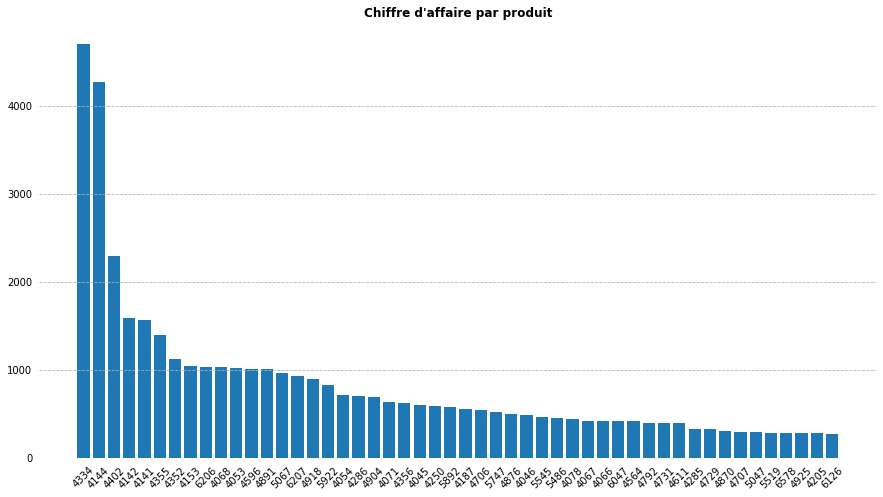

In [43]:
# Visualisation
turnover_product['product_id'] = turnover_product['product_id'].astype('str')

plt.figure(figsize = (15,8))
plt.box(False)
plt.tick_params(bottom = False, left = False)
plt.grid(axis = 'y', ls = '--')

plt.bar(turnover_product['product_id'].head(50), turnover_product['turnover'].head(50))
plt.xticks(rotation = 45)
plt.title("Chiffre d'affaire par produit", fontweight = 'bold');

In [44]:
# Chiffre d'affaires total en ligne

print(f"Le chiffre d'affaire total de la vente en ligne est égal {data[data.onsale_web == 1]['turnover'].sum()} euros.")

Le chiffre d'affaire total de la vente en ligne est égal 70568.6 euros.


<h2><span style = 'color:maroon'>3. Erreurs de saisie sur le prix</span></h2>

In [45]:
# Analyse de la variable prix

display(data.price.describe())

print(f"Il semble avoir des outliers au-dessus de 80. Néanmoins, le prix maximal 225 n'étant pas un prix improbable, ces valeurs peuvent être des prix hors-normes que des erreurs de saisie.")

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

Il semble avoir des outliers au-dessus de 80. Néanmoins, le prix maximal 225 n'étant pas un prix improbable, ces valeurs peuvent être des prix hors-normes que des erreurs de saisie.


### Visualisation

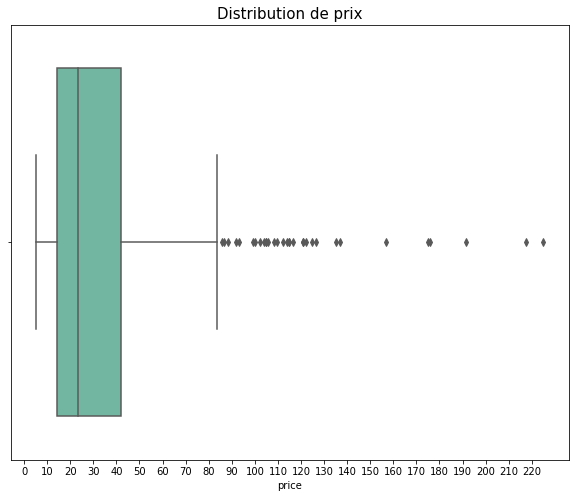

In [46]:
# Visualisation des outliers

plt.figure(figsize=(10,8))
sns.boxplot(x ="price", data = data, palette = 'Set2')
plt.title("Distribution de prix", size = 15)
plt.xticks(np.arange(0, 230, step=10));

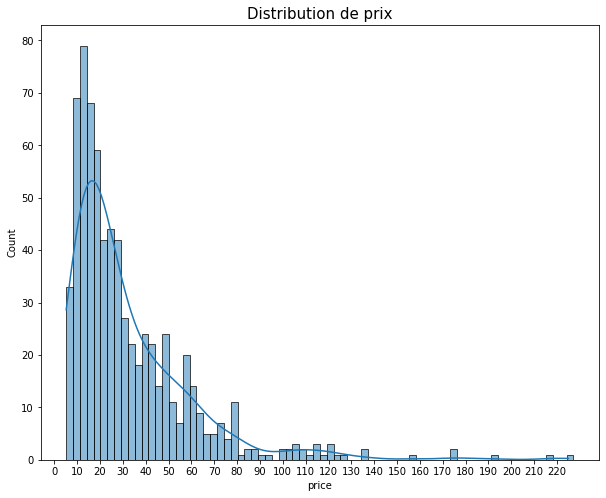

In [47]:
# Visualisation des outliers

plt.figure(figsize=(10,8))
sns.histplot(x ="price", data = data, binwidth = 3, kde = True, palette = 'Set2')
plt.title("Distribution de prix", size = 15);
plt.xticks(np.arange(0, 230, step=10));

In [48]:
# Liste des produits à prix hors normes

valeur_aberrante = np.sort(data.price[data.price > 130])

print('Il y a {} produits qui ont un prix hors normes, soit {}% des produits totaux.'
      .format(len(valeur_aberrante), round(len(valeur_aberrante)/len(data)*100,2)))

produits_prix_erreur = data[data.price >= valeur_aberrante.min()] 
produits_prix_erreur[['product_id','price']].groupby(['product_id']).agg(['min','count']).sort_values(by=[('price','min')])

Il y a 8 produits qui ont un prix hors normes, soit 1.12% des produits totaux.


price      
              min count
product_id             
6126        135.0     1
4904        137.0     1
4406        157.0     1
5767        175.0     1
4402        176.0     1
5892        191.3     1
5001        217.5     1
4352        225.0     1

### Calcul numérique

In [51]:
# Calcul théorique des valeurs aberrantes avec z-score

threshold = 2
outlier = []

for i in data.price:
    z = (i-data.price.mean())/data.price.std()
    if z > threshold:
        outlier.append(i)

print('Il y a {} outliers.'.format(len(outlier)))

Il y a 30 outliers.
